<a href="https://colab.research.google.com/github/haoboooo/Pretrained-CNN-Binary-Classification-in-Skin-Cancer/blob/main/skin_cancer3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install the library of kaggle
!pip install kaggle

In [ ]:
import json
token = {"username":"haoboxu","key":"9cac2e577f5875ae376eece6b11cdd49"}
with open('/content/kaggle.json', 'w') as file:
  json.dump(token, file)

In [ ]:
# 创建文件夹保存密钥
!mkdir -p ~/.kaggle

In [ ]:
# 复制json到路径下
!cp /content/kaggle.json ~/.kaggle/

In [ ]:
# 修改权限确保后续操作正常
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# 指定数据集保存的位置
!kaggle config set -n path -v /content

- path is now set to: /content


In [ ]:
# download the dataset from kaggle
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 99% 322M/325M [00:03<00:00, 103MB/s] 
100% 325M/325M [00:03<00:00, 97.6MB/s]


In [ ]:
!unzip /content/datasets/fanconic/skin-cancer-malignant-vs-benign/skin-cancer-malignant-vs-benign.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/benign/420.jpg  
  inflating: data/train/benign/421.jpg  
  inflating: data/train/benign/422.jpg  
  inflating: data/train/benign/423.jpg  
  inflating: data/train/benign/424.jpg  
  inflating: data/train/benign/425.jpg  
  inflating: data/train/benign/426.jpg  
  inflating: data/train/benign/429.jpg  
  inflating: data/train/benign/43.jpg  
  inflating: data/train/benign/430.jpg  
  inflating: data/train/benign/431.jpg  
  inflating: data/train/benign/432.jpg  
  inflating: data/train/benign/434.jpg  
  inflating: data/train/benign/435.jpg  
  inflating: data/train/benign/438.jpg  
  inflating: data/train/benign/439.jpg  
  inflating: data/train/benign/440.jpg  
  inflating: data/train/benign/441.jpg  
  inflating: data/train/benign/442.jpg  
  inflating: data/train/benign/443.jpg  
  inflating: data/train/benign/445.jpg  
  inflating: data/train/benign/446.jpg  
  inflating: data/train/benign/447.jpg  
  infla

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # build layer
from tensorflow.keras.models import Sequential # build model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator # preprocessing data

import numpy as np #matrices operation
import os
import matplotlib.pyplot as plt #draw diagram
import PIL
from PIL import Image
import pathlib

In [ ]:
#parameters (changing)
train_dir = '/content/train'
test_dir = '/content/test'
batch_size = 64
epochs = 15
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
#data augmentation
#preprocessing data

train_image_generator = ImageDataGenerator(rescale=1./255,#归一化
                                           horizontal_flip=True, #图片翻转, augmentation technology
                                           width_shift_range=.15, #宽变化
                                           height_shift_range=.15, #高变化
                                           rotation_range=45,#旋转45度
                                           zoom_range=0.5 #缩放0.5倍
)
test_image_generator = ImageDataGenerator(rescale=1./255) #test dataset without augmentation

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,#训练集路径
                                                           shuffle=True, #打乱图片顺序
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),#修改图片尺寸
                                                           class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                             directory=test_dir,#测试集路径
                                                             target_size=(IMG_HEIGHT,IMG_WIDTH), #修改图片尺寸
                                                             class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


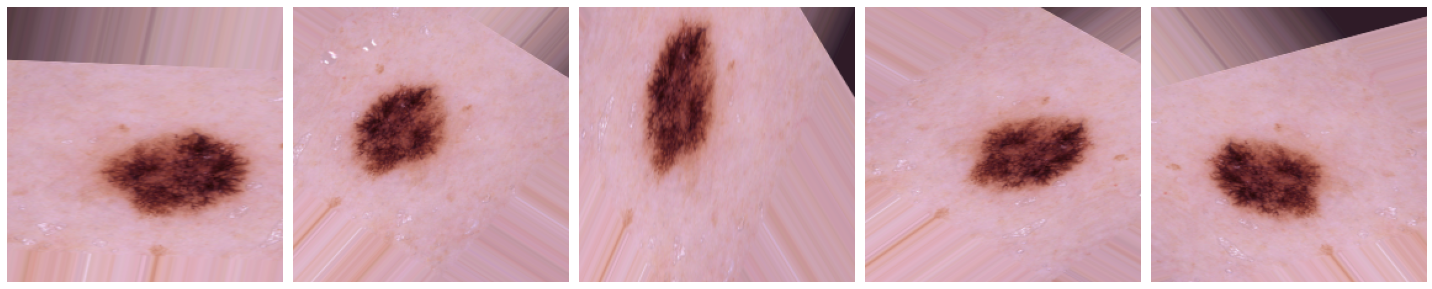

In [ ]:
# plot images we obtain using plt library
def plotImages(images_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
augemted_images=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augemted_images)

In [ ]:
##### build our NASNET-Mobile model #####
model_NASMobile = tf.keras.applications.NASNetMobile(input_shape=(224,224,3),include_top=False,weights=None)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

NASMobile = tf.keras.Sequential([
    model_NASMobile,
    global_average_layer,
    prediction_layer                 
])

In [ ]:
##### compile our NASNET-Mobile model #####
NASMobile.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
##### train our NASNET-Mobile model #####
history = NASMobile.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
42/42 [==============================] - 879s 20s/step - loss: 0.5203 - accuracy: 0.7455 - val_loss: 57.1445 - val_accuracy: 0.4545
Epoch 2/20
42/42 [==============================] - 849s 20s/step - loss: 0.4260 - accuracy: 0.7854 - val_loss: 65.1333 - val_accuracy: 0.4545
Epoch 3/20
42/42 [==============================] - 850s 20s/step - loss: 0.4192 - accuracy: 0.8039 - val_loss: 57.7350 - val_accuracy: 0.4545
Epoch 4/20
42/42 [==============================] - 861s 20s/step - loss: 0.4080 - accuracy: 0.7922 - val_loss: 71.1633 - val_accuracy: 0.4545
Epoch 5/20
42/42 [==============================] - 860s 20s/step - loss: 0.4058 - accuracy: 0.8017 - val_loss: 59.8668 - val_accuracy: 0.4545
Epoch 6/20
42/42 [==============================] - 864s 21s/step - loss: 0.3890 - accuracy: 0.8225 - val_loss: 41.9483 - val_accuracy: 0.4545
Epoch 7/20
42/42 [==============================] - 863s 21s/step - loss: 0.3890 - accuracy: 0.8123 - val_loss: 31.7657 - val_accuracy: 0.4545

In [ ]:
##### build our DenseNet121 model #####
model_Dense = tf.keras.applications.DenseNet121(input_shape=(224,224,3),include_top=False,weights=None)
DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

DenseNet121 = tf.keras.Sequential([
    model_Dense,
    DROP,
    global_average_layer,
    prediction_layer                 
])

In [ ]:
##### compile our DenseNet121 model #####
DenseNet121.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
##### train our DenseNet121 model #####
history = DenseNet121.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
83/83 [==============================] - 2048s 25s/step - loss: 0.5203 - accuracy: 0.7444 - val_loss: 0.7976 - val_accuracy: 0.5742
Epoch 2/10
83/83 [==============================] - 2032s 24s/step - loss: 0.4415 - accuracy: 0.7842 - val_loss: 0.5928 - val_accuracy: 0.7121
Epoch 3/10
83/83 [==============================] - 2028s 24s/step - loss: 0.4344 - accuracy: 0.7873 - val_loss: 0.4953 - val_accuracy: 0.7576
Epoch 4/10
83/83 [==============================] - 2000s 24s/step - loss: 0.4267 - accuracy: 0.7903 - val_loss: 1.2074 - val_accuracy: 0.6500
Epoch 5/10
83/83 [==============================] - 2007s 24s/step - loss: 0.4226 - accuracy: 0.7865 - val_loss: 1.6800 - val_accuracy: 0.4591
Epoch 6/10
83/83 [==============================] - 2009s 24s/step - loss: 0.4331 - accuracy: 0.7854 - val_loss: 0.4190 - val_accuracy: 0.7894
Epoch 7/10
83/83 [==============================] - 2015s 24s/step - loss: 0.4034 - accuracy: 0.8013 - val_loss: 0.5623 - val_accuracy: 0.7273

In [ ]:
##### build our DenseNet169 model #####
base_dense169 = tf.keras.applications.DenseNet169(input_shape=(224,224,3),include_top=False,weights=None)
DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

DenseNet169 = tf.keras.Sequential([
    base_dense169,
    DROP,
    global_average_layer,
    prediction_layer                 
])
DenseNet169.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
##### train our DenseNet169 model #####
history = DenseNet169.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
83/83 [==============================] - 2491s 30s/step - loss: 0.5101 - accuracy: 0.7626 - val_loss: 4.0426 - val_accuracy: 0.5455
Epoch 2/10
83/83 [==============================] - 2466s 30s/step - loss: 0.4576 - accuracy: 0.7823 - val_loss: 1.6795 - val_accuracy: 0.5848
Epoch 3/10
83/83 [==============================] - 2461s 30s/step - loss: 0.4398 - accuracy: 0.7782 - val_loss: 1.1537 - val_accuracy: 0.4545
Epoch 4/10
83/83 [==============================] - 2455s 30s/step - loss: 0.4511 - accuracy: 0.7831 - val_loss: 0.5927 - val_accuracy: 0.7167
Epoch 5/10
83/83 [==============================] - 2457s 30s/step - loss: 0.4433 - accuracy: 0.7774 - val_loss: 1.0500 - val_accuracy: 0.4667
Epoch 6/10
83/83 [==============================] - 2513s 30s/step - loss: 0.4098 - accuracy: 0.7967 - val_loss: 1.4169 - val_accuracy: 0.4864
Epoch 7/10
83/83 [==============================] - 2553s 31s/step - loss: 0.4034 - accuracy: 0.8066 - val_loss: 0.5151 - val_accuracy: 0.7606

In [ ]:
##### build our DenseNet_169 model #####
base_dense_169 = tf.keras.applications.DenseNet169(input_shape=(224,224,3),include_top=False,weights=None)
DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

DenseNet_169 = tf.keras.Sequential([
    base_dense_169,
    DROP,
    global_average_layer,
    prediction_layer                 
])
DenseNet_169.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
##### train our DenseNet_169 model #####
history = DenseNet_169.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
83/83 [==============================] - 2460s 29s/step - loss: 0.5183 - accuracy: 0.7527 - val_loss: 0.7678 - val_accuracy: 0.5712
Epoch 2/15
83/83 [==============================] - 2385s 29s/step - loss: 0.4407 - accuracy: 0.7747 - val_loss: 2.0846 - val_accuracy: 0.5470
Epoch 3/15
83/83 [==============================] - 2374s 29s/step - loss: 0.4729 - accuracy: 0.7603 - val_loss: 1.3313 - val_accuracy: 0.5485
Epoch 4/15
83/83 [==============================] - 2352s 28s/step - loss: 0.4326 - accuracy: 0.7911 - val_loss: 0.6828 - val_accuracy: 0.6182
Epoch 5/15
83/83 [==============================] - 2330s 28s/step - loss: 0.4219 - accuracy: 0.7933 - val_loss: 1.7465 - val_accuracy: 0.4606
Epoch 6/15
83/83 [==============================] - 2335s 28s/step - loss: 0.4340 - accuracy: 0.7850 - val_loss: 1.0332 - val_accuracy: 0.4864
Epoch 7/15
83/83 [==============================] - 2324s 28s/step - loss: 0.4230 - accuracy: 0.7986 - val_loss: 1.9268 - val_accuracy: 0.5091

In [ ]:
##### build our DenseNet201 model #####
base_dense201 = tf.keras.applications.DenseNet201(input_shape=(224,224,3),include_top=False,weights=None)
DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

DenseNet201 = tf.keras.Sequential([
    base_dense201,
    DROP,
    global_average_layer,
    prediction_layer                 
])
DenseNet201.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
##### train our DenseNet201 model #####
history = DenseNet201.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
83/83 [==============================] - 3061s 37s/step - loss: 0.5216 - accuracy: 0.7512 - val_loss: 2.8543 - val_accuracy: 0.5455
Epoch 2/10
83/83 [==============================] - 3139s 38s/step - loss: 0.4455 - accuracy: 0.7675 - val_loss: 2.8561 - val_accuracy: 0.5470
Epoch 3/10
83/83 [==============================] - 2882s 35s/step - loss: 0.4485 - accuracy: 0.7869 - val_loss: 1.0960 - val_accuracy: 0.4561
Epoch 4/10
83/83 [==============================] - 3056s 37s/step - loss: 0.4413 - accuracy: 0.7797 - val_loss: 0.5457 - val_accuracy: 0.7136
Epoch 5/10
83/83 [==============================] - 2988s 36s/step - loss: 0.4250 - accuracy: 0.8020 - val_loss: 0.5994 - val_accuracy: 0.7061
Epoch 6/10
83/83 [==============================] - 3034s 37s/step - loss: 0.4366 - accuracy: 0.7922 - val_loss: 0.6496 - val_accuracy: 0.6333
Epoch 7/10
83/83 [==============================] - 2927s 35s/step - loss: 0.4220 - accuracy: 0.7895 - val_loss: 0.8157 - val_accuracy: 0.6803

In [ ]:
##### build our DenseNet_201 model #####
base_dense_201 = tf.keras.applications.DenseNet201(input_shape=(224,224,3),include_top=False,weights=None)
DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')

DenseNet_201 = tf.keras.Sequential([
    base_dense_201,
    DROP,
    global_average_layer,
    prediction_layer                 
])
DenseNet_201.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
##### train our DenseNet_201 model #####
history = DenseNet_201.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
83/83 [==============================] - 2518s 30s/step - loss: 0.5210 - accuracy: 0.7516 - val_loss: 1.1885 - val_accuracy: 0.5515
Epoch 2/15
83/83 [==============================] - 2330s 28s/step - loss: 0.4534 - accuracy: 0.7842 - val_loss: 1.0376 - val_accuracy: 0.5561
Epoch 3/15
83/83 [==============================] - 2419s 29s/step - loss: 0.4526 - accuracy: 0.7838 - val_loss: 5.5580 - val_accuracy: 0.5606
Epoch 4/15
83/83 [==============================] - 2300s 28s/step - loss: 0.4469 - accuracy: 0.7827 - val_loss: 0.8414 - val_accuracy: 0.5879
Epoch 5/15
83/83 [==============================] - 2308s 28s/step - loss: 0.4578 - accuracy: 0.7823 - val_loss: 2.2349 - val_accuracy: 0.4576
Epoch 6/15
83/83 [==============================] - 2290s 28s/step - loss: 0.4293 - accuracy: 0.7914 - val_loss: 6.2896 - val_accuracy: 0.4924
Epoch 7/15
83/83 [==============================] - 2292s 28s/step - loss: 0.4271 - accuracy: 0.7873 - val_loss: 1.5508 - val_accuracy: 0.4818

In [ ]:
##### build our Xception model #####
base_xcep = tf.keras.applications.Xception(input_shape=(224,224,3),include_top=False,weights=None)
DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')
Xception = tf.keras.Sequential([
    base_xcep,
    DROP,
    global_average_layer,
    prediction_layer                 
])
Xception.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
##### train our Xception model #####
history = Xception.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
42/42 [==============================] - 2390s 57s/step - loss: 0.5902 - accuracy: 0.7474 - val_loss: 0.6927 - val_accuracy: 0.5455
Epoch 2/15
42/42 [==============================] - 2323s 55s/step - loss: 0.4209 - accuracy: 0.7922 - val_loss: 0.6921 - val_accuracy: 0.5455
Epoch 3/15
42/42 [==============================] - 2329s 55s/step - loss: 0.4142 - accuracy: 0.8055 - val_loss: 0.6909 - val_accuracy: 0.5455
Epoch 4/15
42/42 [==============================] - 2308s 55s/step - loss: 0.3959 - accuracy: 0.8104 - val_loss: 0.6896 - val_accuracy: 0.5455
Epoch 5/15
42/42 [==============================] - 2538s 61s/step - loss: 0.3908 - accuracy: 0.8119 - val_loss: 0.6886 - val_accuracy: 0.5455
Epoch 6/15
42/42 [==============================] - 2684s 64s/step - loss: 0.3592 - accuracy: 0.8316 - val_loss: 0.6882 - val_accuracy: 0.5455
Epoch 7/15
42/42 [==============================] - 2678s 64s/step - loss: 0.3408 - accuracy: 0.8411 - val_loss: 0.6911 - val_accuracy: 0.5455

In [ ]:
##### build our pre_Xception model #####
xcep = tf.keras.applications.Xception(input_shape=(224,224,3),include_top=False,weights='imagenet')
DROP = tf.keras.layers.Dropout(0.5)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()	
prediction_layer = layers.Dense(1,activation='sigmoid')
pre_Xception = tf.keras.Sequential([
    xcep,
    DROP,
    global_average_layer,
    prediction_layer                 
])
pre_Xception.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
##### train our pre_Xception model #####
history = pre_Xception.fit_generator(
    train_data_gen, #训练集
    epochs=epochs,
    validation_data=test_data_gen
)

83697664/83683744 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
42/42 [==============================] - 1923s 46s/step - loss: 0.3787 - accuracy: 0.8203 - val_loss: 0.9119 - val_accuracy: 0.7788
Epoch 2/15
42/42 [==============================] - 1911s 46s/step - loss: 0.3498 - accuracy: 0.8415 - val_loss: 1.0692 - val_accuracy: 0.8030
Epoch 3/15
42/42 [==============================] - 1913s 46s/step - loss: 0.2783 - accuracy: 0.8665 - val_loss: 5.1754 - val_accuracy: 0.7121
Epoch 4/15
42/42 [==============================] - 1907s 45s/step - loss: 0.2600 - accuracy: 0.8737 - val_loss: 0.8039 - val_accuracy: 0.8530
Epoch 5/15
42/42 [==============================] - 1913s 46s/step - loss: 0.2636 - accuracy: 0.8775 - val_loss: 0.6117 - val_accuracy: 0.8197
Epoch 6/15
42/42 [==============================] - 1930s 46s/step - loss: 0.2275 - accuracy: 0.8934 - val_loss: 2.1553 - val_accuracy: 0.7970
Epoch 7/15
42/42 [==============================] - 1926s 46s/step - loss: 0.2270 - accuracy: 0.8980 - val_loss: 0.2659 - val_accuracy: 0.8848